In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, TimeDistributed, Flatten
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import matplotlib.mlab as mlab
import seaborn as sns  
from numpy import genfromtxt

/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/niall/opt/anaconda3/envs/DCUML

## Model Mismatch

### SNR dB -10 Model Evaluated on SNR dB -5 Data

In [58]:
snr_missmatch_score, snr_missmatch_acc = model_one_snrminusten.evaluate(snr_minus5_data[0], snr_minus5_data[1], batch_size=batch_size)

75000/75000 [==============================] - 17s 233us/sample - loss: 0.6097 - acc: 0.6676


In [59]:
print('Test Loss: ', snr_missmatch_score)
print('Test Accuracy', snr_missmatch_acc)

Test Loss:  0.6097392878492673
Test Accuracy 0.66756


In [60]:
y_preds_missmatch = model_one_snrminusten.predict(snr_minus5_data[0], batch_size=1)

In [62]:
pred_df = pd.DataFrame(y_preds_missmatch, columns =['Y_pred']) 
pred_df['Label'] = snr_minus5_data[1]

In [63]:
y_pred_ref_ref = pred_df[pred_df['Label'] == 1]
y_pred_ref_ref.head()

,Y_pred,Label
0,0.381132,1.0
1,0.391023,1.0
5,0.427266,1.0
8,0.406850,1.0
20,0.396459,1.0


In [64]:
y_pred_non_ref = pred_df[pred_df['Label'] == 0]
y_pred_non_ref.head()

,Y_pred,Label
2,0.289311,0.0
3,0.231401,0.0
4,0.332323,0.0
6,0.212917,0.0
7,0.320289,0.0


Text(0.5, 1.0, 'All y_preds flip_bits')

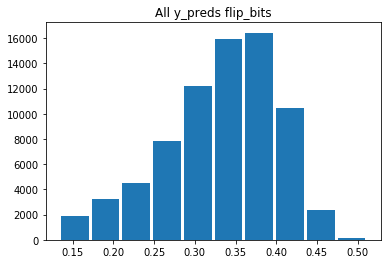

In [66]:
plt.hist(y_preds_missmatch, rwidth=0.9)
plt.title('All y_preds flip_bits')

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

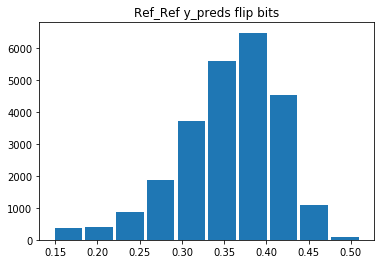

In [67]:
plt.hist(y_pred_ref_ref['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

Text(0.5, 1.0, 'Not Ref_Ref y_preds flip_bits')

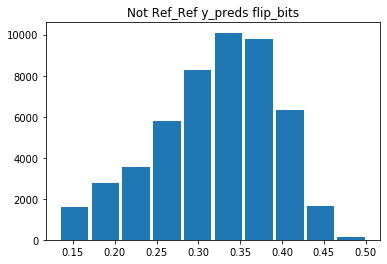

In [68]:
plt.hist(y_pred_non_ref['Y_pred'], rwidth=0.9)
plt.title('Not Ref_Ref y_preds flip_bits')

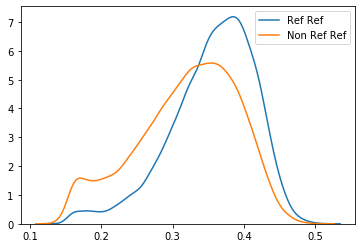

In [69]:
ax = sns.kdeplot(y_pred_ref_ref['Y_pred'], label='Ref Ref')
sns.kdeplot(y_pred_non_ref['Y_pred'],label='Non Ref Ref', ax=ax)

### SNR dB -10 Model Evaluated on SNR dB 0 Data

In [72]:
snr_missmatch_zero_score, snr_missmatch_zero_acc = model_one_snr_minus5.evaluate(snrzero_data[0], snrzero_data[1], batch_size=batch_size)

75000/75000 [==============================] - 17s 227us/sample - loss: 0.4116 - acc: 0.8285


In [73]:
print('Test Loss: ', snr_missmatch_zero_score)
print('Test Accuracy', snr_missmatch_zero_acc)

Test Loss:  0.4116140751287341
Test Accuracy 0.82850665


In [74]:
snr_missmatch_five_score, snr_missmatch_five_acc = model_one_snr_minus5.evaluate(snr5_data[0], snr5_data[1], batch_size=batch_size)

75000/75000 [==============================] - 19s 258us/sample - loss: 0.4158 - acc: 0.7838


In [75]:
print('Test Loss: ', snr_missmatch_five_score)
print('Test Accuracy', snr_missmatch_five_acc)

Test Loss:  0.41580534112850825
Test Accuracy 0.78382665


In [76]:
snr_missmatch_ten_score, snr_missmatch_ten_acc = model_one_snr_minus5.evaluate(snrten_data[0], snrten_data[1], batch_size=batch_size)

75000/75000 [==============================] - 21s 278us/sample - loss: 0.4228 - acc: 0.7667 - loss: 0.4226 -  - ETA: 0s - loss: 0.42


In [77]:
print('Test Loss: ', snr_missmatch_ten_score)
print('Test Accuracy', snr_missmatch_ten_acc)

Test Loss:  0.4228184742875397
Test Accuracy 0.76670665
